In [21]:
!pip3 install bs4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from bs4 import BeautifulSoup
import requests

import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
def get_art_data(temp, start_save_numb):
  images_info_list = []
  for i in range(len(temp)): 
    price = temp[i].find('div', class_='price').text.replace(' ', '').replace('\n', '')
    if len(price) != 0:   
      try:
        images_info_list.append({'img_url': temp[i].find('img', class_='img-responsive')['src'],
                                'img_path': f'img_{start_save_numb + i}.png',
                                'name': temp[i].find('span', class_='title').text,
                                'artist': temp[i].find('strong', class_='artist').text,
                                'tech': temp[i].find('div', class_='tech').text.replace(' ', '').replace('\n', ''),
                                'price': price})
        p = requests.get(images_info_list[-1]['img_url'])
        out = open(f'/content/drive/MyDrive/art/img_{start_save_numb + i}.png', "wb")
        out.write(p.content)
        out.close()
        print(f'{i} process for {images_info_list[-1]["name"]}   {images_info_list[-1]["price"]} is finished!')
      except:
       next
  return images_info_list

In [36]:
url = 'https://www.artprice.com/marketplace?sort=sort_dt-desc'

In [37]:
response = requests.get(url)
print(response)
bs = BeautifulSoup(response.text,"lxml")
temp = bs.find_all('div', 'square')

<Response [200]>


In [38]:
im_list = get_art_data(temp, 0)

0 process for communication II   6,900€(7,573$) is finished!
1 process for despedida   2,200€(2,414$) is finished!
7 process for Open Cube in Color on Color Plate 15   2,000€(2,195$) is finished!
8 process for Open Cube in Color on Color Plate 14   2,000€(2,195$) is finished!
10 process for Open Cube in Color on Color Plate 13   2,000€(2,195$) is finished!
11 process for Open Cube in Color on Color Plate 12   2,000€(2,195$) is finished!
12 process for Open Cube in Color on Color Plate 11   2,000€(2,195$) is finished!
13 process for Open Cube in Color on Color Plate 10   2,000€(2,195$) is finished!
14 process for Open Cube in Color on Color Plate 09   2,000€(2,195$) is finished!
15 process for Open Cube in Color on Color Plate 08   2,000€(2,195$) is finished!
16 process for Open Cube in Color on Color Plate 07   2,000€(2,195$) is finished!
17 process for Open Cube in Color on Color Plate 06   2,000€(2,195$) is finished!
18 process for Open Cube in Color on Color Plate 05   2,000€(2,195$

communication II    6,900€(7,573$)


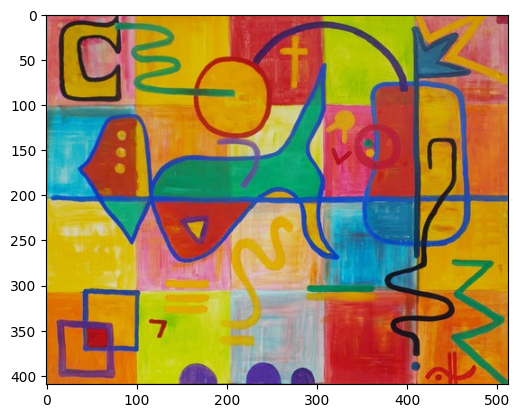

In [39]:
print(im_list[0]['name'], '  ',  im_list[0]['price'])
path = '/content/drive/MyDrive/art/' + im_list[0]['img_path']
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [40]:
data = pd.DataFrame(im_list)
data

,img_url,img_path,name,artist,tech,price
0,https://imgprivate2.artprice.com/get/classifie...,img_0.png,communication II,Natalie Karen MOSS,PaintingAcrylic,"6,900€(7,573$)"
1,https://imgprivate2.artprice.com/get/classifie...,img_1.png,despedida,Victor Alexis PUIG,PaintingOil,"2,200€(2,414$)"
2,https://imgprivate2.artprice.com/get/classifie...,img_7.png,Open Cube in Color on Color Plate 15,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
3,https://imgprivate2.artprice.com/get/classifie...,img_8.png,Open Cube in Color on Color Plate 14,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
4,https://imgprivate2.artprice.com/get/classifie...,img_10.png,Open Cube in Color on Color Plate 13,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
5,https://imgprivate2.artprice.com/get/classifie...,img_11.png,Open Cube in Color on Color Plate 12,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
6,https://imgprivate2.artprice.com/get/classifie...,img_12.png,Open Cube in Color on Color Plate 11,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
7,https://imgprivate2.artprice.com/get/classifie...,img_13.png,Open Cube in Color on Color Plate 10,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
8,https://imgprivate2.artprice.com/get/classifie...,img_14.png,Open Cube in Color on Color Plate 09,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"
9,https://imgprivate2.artprice.com/get/classifie...,img_15.png,Open Cube in Color on Color Plate 08,Sol LEWITT,Print-MultipleLinocut,"2,000€(2,195$)"


In [ ]:
for i in range(890, 2450):
  print(f'page {i}')
  url = f'https://www.artprice.com/marketplace?idcurrencyzone=2&p={i}&sort=sort_dt-desc'
  response = requests.get(url)
  print(response)
  bs = BeautifulSoup(response.text,"lxml")
  temp = bs.find_all('div', 'square')
  im_list = get_art_data(temp, 31 * i)

  print(im_list[0]['name'], '  ',  im_list[0]['price'])
  path = '/content/drive/MyDrive/art/'  + im_list[0]['img_path']
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.show()

  new_data_part = pd.DataFrame(im_list)
  data = pd.concat([data, new_data_part])
  print(len(data))
  print(data.iloc[-1])

  if i % 10 == 0:
    print('data save to: ')
    print(f'/content/drive/MyDrive/art/data_info_{i}.csv')
    data.to_csv(f'/content/drive/MyDrive/art/data_info_{i}.csv')

In [ ]:
data.to_csv('/content/drive/MyDrive/art/data_info_99.csv')

In [ ]:
data